# Homework 3
Name: Yushu Liu

Wustlkey: yushu.liu 

Partner Name:

Partner Wustlkey:

### Notes and Submission Instructions:  
* **Libraries**: You may use available NetworkX functions. 
* **Comments**: Comment your code to receive maximum credit.
* **Number of Cells**: Do not change the number of (code or markdown) cells in this notebook.
* **What to submit**: Only submit the hw3_problem3.ipynb - nothing else. 

## Problem 3: Power Laws - Empirical Study (50%)

For someone new to the field of network analysis it might be rather surprising that the degree
distributions of real world networks almost always follows a power-law distribution.
Here are a couple of examples:
<img src="powerDistributions.jpeg" width="500">
So, one task in studying real world (social) networks is to figure out if the degree distribution follows a power-law and if so, to estimate the exponent α (In fact, in the early 2000s that was _all_ you needed to to do to publish a paper!! See references in the lecture slides.).  In this problem, you will generate a synthetic dataset following a power-law distribution to test various methods for **estimating the exponent** of the distribution.

### 3.1 Inverse CCDF (pen & paper - 5%)
You can generate a random sample from the power-law distribution using a uniform random sample $u ∼ U[0, 1]$ (which you can generate using the pseudo random number generator in Python) and a technique called _inverse transform sampling_. Inverse transform sampling works as follows:
- Take your uniform samples u
- Compute the value k such that $P(X ≥ k) = u$, where we use the CCDF from problem 2. 

> Note that k does indeed follow the power-law distribution P(k). 
> This is given by the __probability integral transform__:
> If X is a continuous random variable with cumulative distribution function $F_{X}$, then
> the random variable $Y = F_{X}(x)$ has a uniform distribution on [0, 1].

Derive the inverse of the CCDF in dependency of u. Remember that you can type Latex in the markdown box below. 

**Answer:**

$$P(X\ge k) = (\frac{k}{k_{min}})^{(-\alpha+1)}=u$$
$$k=k_{min}u^{\frac{1}{-\alpha+1}}$$

### 3.2 Create Synthetic Data (8%)
#### (i) __[Sampling]__
Below, using this sampling technique, create a dataset of 10,000 samples
following the power-law distribution with exponent $α = 2$ and $k_{min} = 1$. 

__Your Program Below:__

In [49]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# define a function generate random sample using power law
def generate(num_samples, k_min, alpha):
    return k_min * (1 - np.random.uniform(size=num_samples))**(1 / (1 - alpha))

np.random.seed(0)

#Generate sample using definde function
sample = generate(10000, 1, 2)

#### (ii) __[Plot]__
Plot the empirical distribution on a log-log scale by first rounding each sample to the nearest
integer and then plotting the empirical distribution over these rounded values. Add a plot of the true probability density function for the power law (this will help you verify that you generated the data correctly). Label the axes and add a legend and title to your plot. 

__Your Program Below:__

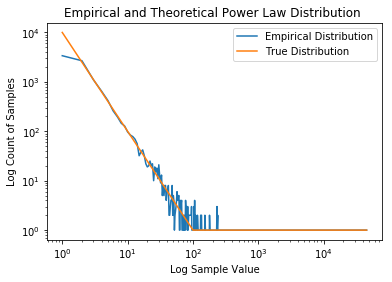

In [50]:
#Round sample to nearest integer
rounded_sample = np.around(sample)

#Convert to plot
XY = sorted(zip(Counter(rounded_sample).keys(), Counter(rounded_sample).values()))
X,Y = zip(*XY)
logX, logY = np.log10(X), np.log10(Y)

#Compute for true probabiliy
trueX = np.arange(1, max(X))
trueY = np.maximum(10000 * (2 - 1) / 1 * (trueX / 1)**(-2), 1)

#plot on log scale
plt.loglog(X,Y)
plt.loglog(trueX, trueY)
plt.legend(["Empirical Distribution", "True Distribution"])
plt.title("Empirical and Theoretical Power Law Distribution ")
plt.xlabel("Log Sample Value")
plt.ylabel("Log Count of Samples")
plt.show()

### 3.3 PDF (18%)
One way to fit a power-law distribution to data is through a _least-squares linear
regression_ on the histogram of the data. Least-squares regression assumes a linear
dependency $y = mx + c$ and solves the following equation:

$\begin{bmatrix}\hat{m}\\\hat{c}\end{bmatrix} = \underset{m,c}{\operatorname{argmin}}\lVert \mathbf{y-X\begin{bmatrix}{m}\\{c}\end{bmatrix}} \rVert^{2}$

Where:

$ X = \begin{bmatrix}x_{1} & 1 \\ x_{2} & 1 \\ \vdots & \vdots \\ x_{n} & 1\end{bmatrix}  \in \mathbb{R}^{n \times 2} $ and $ y = \begin{bmatrix}y_{1} \\ y_{2} \\ \vdots \\ y_{n} \end{bmatrix} \in \mathbb{R}^{n}$ where $n$ is the number of samples in your dataset.

#### (i) __[Pen and Paper]__
Using the PDF derived in problem 2, show how to set up a linear least-squares
problem for estimating α from the histogram data (empirical PDF).

__Your Answer Below:__

Since for $\alpha = 2$ and $x_{min} = 1$, the PDF can be written as:
$$P(x) = (\alpha - 1)d^{-\alpha}$$
taking log would result in: 
$$log (P(x)) = -\alpha log({x}) + log(\alpha -1) $$
Then perform a linear regression with formula $y = ax + b$ on $y = log (P(x))$ and $x = log({x})$, $a$ will then be the unbiased estimate of $-\alpha$.

#### (ii) __[Implementation]__
Compute the least-squares estimate $\hat{α}$ of $α$ using the dataset generated in the
previous part. Again, round your samples to the nearest integer to compute
the histogram of the data. (You can use numpy.linalg.lstsq to solve the least
squares problem.)

__Your Code Below:__

In [77]:
#fit linear regression
res = np.polyfit(logX, logY, 1)
a1, b1 = res[0], res[1]
Estimated_Y_pdf = np.maximum(10**(a1 * np.log10(trueX) + b1), 1)
alpha = -a1

alpha

-0.7772832156316375 2.0750376952226475


#### (iii) [Plot]
Create a new plot adding the estimated PDF to the empirical data and the true PDF. Label the axes and add a legend and title to your plot. 

__Your Code Below:__

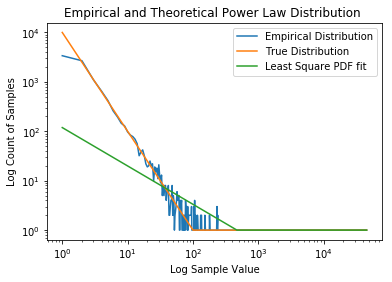

In [52]:
plt.loglog(X,Y)
plt.loglog(trueX, trueY)
plt.loglog(trueX, Estimated_Y_pdf)
plt.legend(["Empirical Distribution", "True Distribution", "Least Square PDF fit"])
plt.title("Empirical and Theoretical Power Law Distribution ")
plt.xlabel("Log Sample Value")
plt.ylabel("Log Count of Samples")
plt.show()

#### (iv) [Analysis] 
 Why does this method produce a bad fit (estimate for $α$)?
 
__Your Answer Below:__

There are lots of sample value has counts 1 or extremly counts (outliers).If using pdf, when converting to log scale, it will result in lots of zeros and lead to biased estimate of alpha. 

### 3.4 CCDF (14%)
Using the same data as in the previous parts, estimate α using the CCDF on the rounded data.

#### (i) [Pen and Paper]
Similar to part (c), show how to set up a linear least-squares problem for estimating
$α$ from the empirical CCDF.

__Your Answer Below:__

Since the CCDF can be written as:
$$P(D_{v} \geq d) = \frac{d}{d_{min}}^{-(\alpha -1)}$$
taking log would result in: 
$$log (P(D_{v} \geq d)) = -(\alpha - 1) log(\frac{d}{d_{min}})$$
Then perform a linear regression with formula $y = ax + b$ on $y = log (P(D_{v} \geq d)$ and $x = log(\frac{d}{d_{min}})$, $a$ will then be the unbiased estimate of $-(\alpha - 1)$. 

#### (ii) [Implementation]
Compute the least-squares estimate $\hat{α}_{CCDF}$ for CCDF and report the estimate for
the PDF exponent $\hat{α}_2$.

> **Notation:** We use _hats_ to represent estimates of the true exponent (that is actually
unobserved for real networks). We use _subscripts_ (1,2,3) to refer the the
differnt methods we explore to estimate the exponent from the empirical data: 1=PDF, 2=CCDF, 3=MLE. 
<br>**Math:** We can get $α = {α}_{CCDF} +1$, where ${α}_{CCDF}$ is the exponent of the CCDF and $α$ is the exponent of the PDF.

__Your Code Below:__

In [91]:
#define a function to generate ccdf
def gen_ccdf(data,N):
    counter = Counter(data)
    cum = 0
    ccdf = {}
    for x in sorted(counter.keys(),reverse=True):
        cum += counter[x]
        ccdf[x] = cum/N
    x,y = zip(*(ccdf.items()))
    return np.array(x),np.array(y)

X_ccdf, Y_ccdf = gen_ccdf(sample, 10000)

#find slope of fit   
res_1 = np.polyfit(np.log(X_ccdf),np.log(Y_ccdf), 1)
a2 = res_1[0]
alpha_2 = -a2+1
#compute Y for next question
Estimated_Y_cdf  = np.maximum(10000 * (alpha_2 - 1) /1 * (trueX / 1)**(-alpha_2), 1)

#print(alpha_2, a2, b2)

#### (iii) [Plot]
 Create a new plot adding the newly estimated PDF to the empirical data and the
true PDF and add it to your written submission. Label the axes and add a legend and title to your plot. 

__Your Code Below:__

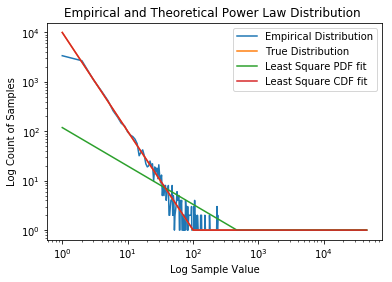

In [79]:
#plot all pdf 
plt.loglog(X,Y)
plt.loglog(trueX, trueY)
plt.loglog(trueX, Estimated_Y_pdf)
plt.loglog(trueX, Estimated_Y_cdf)
plt.legend(["Empirical Distribution", "True Distribution", "Least Square PDF fit", "Least Square CDF fit"])
plt.title("Empirical and Theoretical Power Law Distribution ")
plt.xlabel("Log Sample Value")
plt.ylabel("Log Count of Samples")
plt.show()

### 3.5 Comparison (5%)
Generate 50-100 datasets of 10,000 samples each following the procedure in part 3.2. For each dataset, compute the estimates $\hat{α}_{1}$ and $\hat{α}_{2}$. Report the sample mean and standard deviation of each estimate as well as the number of sampled datasets used and argue which method estimates the true α best.


__Your Code Below:__

In [90]:
def pdf_fit(sample):
    XY = sorted(zip(Counter(sample).keys(), Counter(sample).values()))
    X,Y = zip(*XY)
    logX, logY = np.log10(X), np.log10(Y)
    res = np.polyfit(logX, logY, 1)
    a1, b1 = res[0], res[1]
    alpha = -a1
    return alpha
    
def ccdf_fit(X, Y):
    res_1 = np.polyfit(np.log(X_ccdf),np.log(Y_ccdf), 1)
    a2 = res_1[0]
    alpha_2 = -a2+1
    return alpha_2
n = 0  
L_a1 = []
L_a2 = []
while n < 100:
    S = np.around(generate(10000, 1, 2))
    L_a1.append(pdf_fit(S))
    #print(pdf_fit(sample))
    X_ccdf, Y_ccdf = gen_ccdf(S, 10000)
    L_a2.append(ccdf_fit(X_ccdf, Y_ccdf))
    n = n + 1

print("Mean of alpha_1 is: ", np.mean(L_a1), ", SD of alpha_1 is: ", np.std(L_a1))
print("Mean of alpha_2 is: ", np.mean(L_a2), ", SD of alpha_1 is: ", np.std(L_a2))   
    
        

Mean of alpha_1 is:  0.9413156113272578 , SD of alpha_1 is:  0.08827761060111111
Mean of alpha_2 is:  1.991298959851394 , SD of alpha_1 is:  0.06589429702140025


__Your Answer Below:__

Mean of alpha_1 is:  0.9413156113272578 , SD of alpha_1 is:  0.08827761060111111
Mean of alpha_2 is:  1.991298959851394 , SD of alpha_1 is:  0.06589429702140025

The regression using CCDF is obvious better since the mean is closer to the actual alpha used to generate data and the standard deviation is smaller (more accurate and precise). 

### BONUS: MLE (no credit)
> This section is for _fun_ only and not for credit... 

#### (i) MLE Estimation and Plot
Derive the maximum likelihood estimate $\hat{α}_{3}$ of $α$ (assume that $k_{min} = 1$). Use the
same dataset generated in part 2.2. Make the same plot as in the previous parts now
showing the estimated probability distribution you got from this approach along wiht the data and the true PDF. Find
a description of this approach in Power-law Distributions in Empirical Data (Appendix
B): https://www.cse.wustl.edu/~m.neumann/fl2018/cse416/powerlaw_clauset2009.pdf.

Label the axes and add a legend and title to your plot. 

__Your Code Below:__

In [5]:
"Your Code Goes Here"

'Your Code Goes Here'

#### (ii) Grand Comparison
Repeat the process of the previous part for 50-100 sampled datasets to get a mean estimate and standard deviation using the MLE method and compare it to your results from 3.5.

__Your Code Below:__

In [6]:
"Your Code Goes Here"

'Your Code Goes Here'

__Your Answer Below:__